In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
house_data = pd.read_csv(link)

##Decouverte du dataset : taille, colonnes, infos, types de données

In [21]:
#On met la colonne date au bon format
house_data['date'] = pd.to_datetime(house_data['date'])

In [22]:
house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,NaN,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [23]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21609 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [24]:
#Il y a donc 4 nan dans la colonne "price": ce sont les logements dont nous devons prédire le prix ! On sépare donc notre dataframe en deux

house_data_to_predict = house_data[house_data.isnull().any(axis=1)]
house_data = house_data.dropna()

In [25]:
house_data_to_predict

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,2015-02-23,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,NaN,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [27]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21609 non-null  int64         
 1   date           21609 non-null  datetime64[ns]
 2   price          21609 non-null  float64       
 3   bedrooms       21609 non-null  int64         
 4   bathrooms      21609 non-null  float64       
 5   sqft_living    21609 non-null  int64         
 6   sqft_lot       21609 non-null  int64         
 7   floors         21609 non-null  float64       
 8   waterfront     21609 non-null  int64         
 9   view           21609 non-null  int64         
 10  condition      21609 non-null  int64         
 11  grade          21609 non-null  int64         
 12  sqft_above     21609 non-null  int64         
 13  sqft_basement  21609 non-null  int64         
 14  yr_built       21609 non-null  int64         
 15  yr_renovated   2160

In [28]:
house_data[['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement' ]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.401174e+05,3.370957,2.114848,2080.009394,1.510927e+04,1.494215,3.409505,7.656902,1788.446388,291.563006
std,3.671546e+05,0.930041,0.770114,918.462157,4.142399e+04,0.539995,0.650779,1.175546,828.126031,442.598231
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,4.000000,8.000000,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000


In [29]:
#Un outliers à supprimer: 33 chambres
house_data[house_data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [30]:
house_data.drop(house_data[house_data['bedrooms'] == 33].index, inplace=True)

##Exploration graphique du dataset 

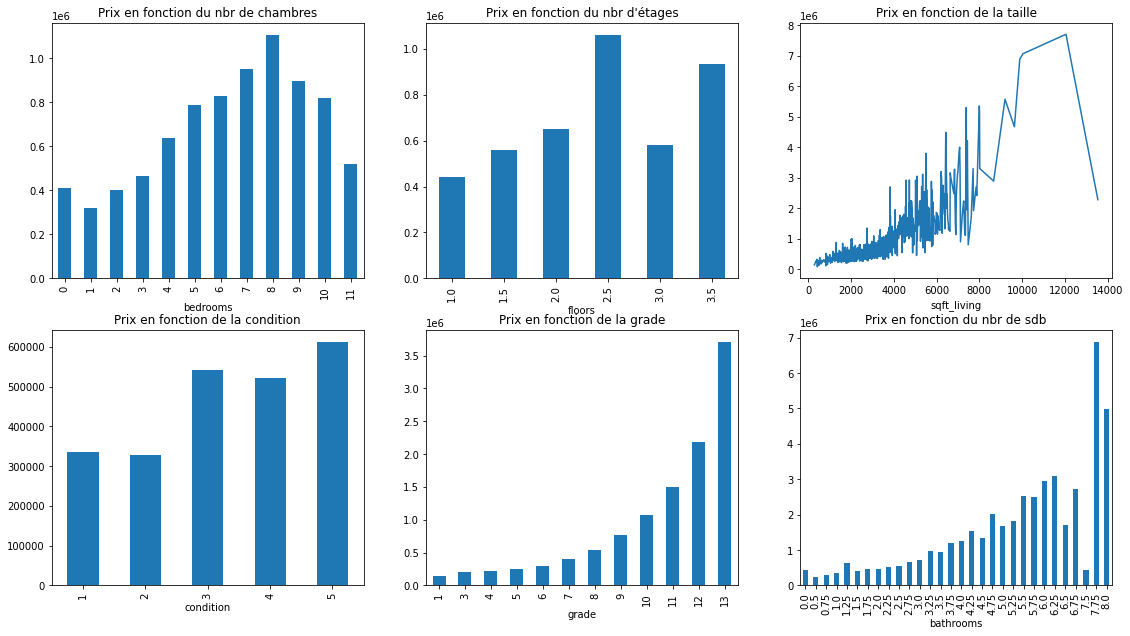

In [31]:
fig = plt.subplots(figsize = (19,16))

#Prix en fonction du nbr de chambres
graph1 = plt.subplot(3,3,1) 
graph1 = house_data.groupby(['bedrooms'])['price'].mean().plot(kind='bar')
graph1.set_title("Prix en fonction du nbr de chambres")

#Prix en fonction du nbr d'étages
graph2 = plt.subplot(3,3,2) 
graph2 = house_data.groupby(['floors'])['price'].mean().plot(kind='bar')
graph2.set_title("Prix en fonction du nbr d'étages")

#Prix en fonction de la taille
graph3 = plt.subplot(3,3,3) 
graph3 = house_data.groupby(['sqft_living'])['price'].mean().plot(kind='line')
graph3.set_title('Prix en fonction de la taille')

#Prix en fonction de la condition
graph4 = plt.subplot(3,3,4) 
graph4 = house_data.groupby(['condition'])['price'].mean().plot(kind='bar')
graph4.set_title('Prix en fonction de la condition')

#Prix en fonction de la grade
graph5 = plt.subplot(3,3,5) 
graph5 = house_data.groupby(['grade'])['price'].mean().plot(kind='bar')
graph5.set_title('Prix en fonction de la grade')

#Prix en fonction du nbr de sdb
graph6 = plt.subplot(3,3,6) 
graph6 = house_data.groupby(['bathrooms'])['price'].mean().plot(kind='bar')
graph6.set_title('Prix en fonction du nbr de sdb')

plt.show()

Boxplots

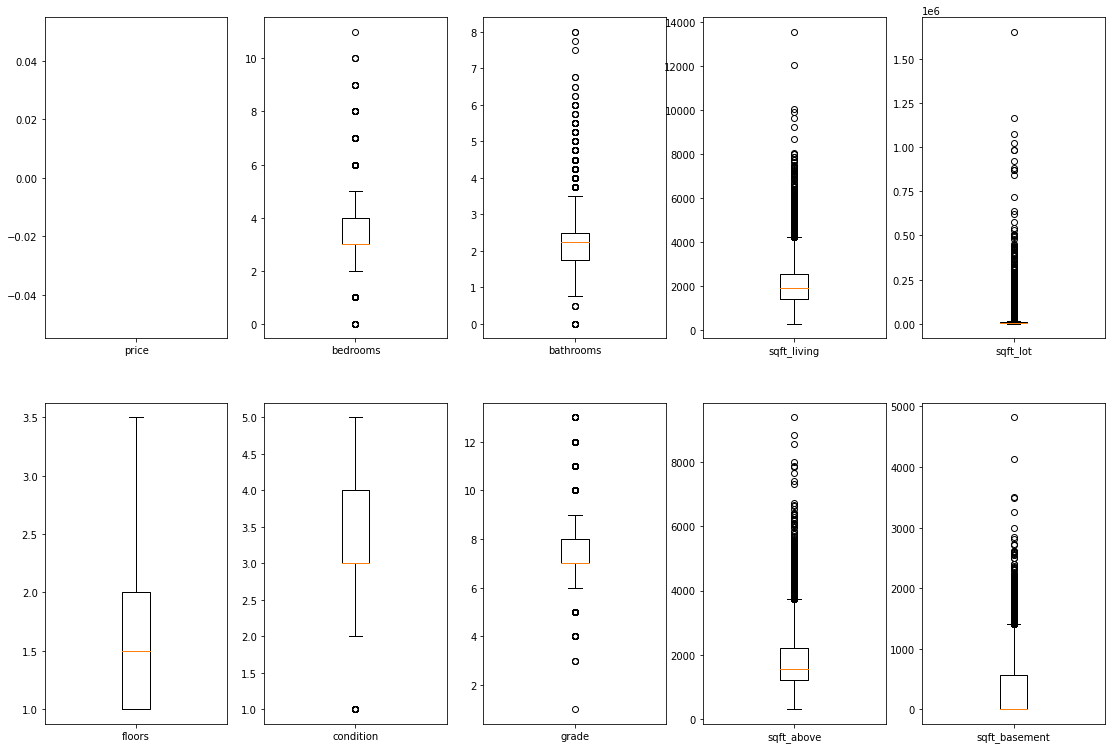

In [ ]:
fig, ax = plt.subplots(figsize = (19,13))

graph1 = plt.subplot(2,5,1) 
graph1.boxplot([house_data["price"]], labels=['price'])

graph2 = plt.subplot(2,5,2) 
graph2.boxplot([house_data["bedrooms"]], labels=['bedrooms'])

graph3 = plt.subplot(2,5,3) 
graph3.boxplot([house_data["bathrooms"]], labels=['bathrooms'])

graph4 = plt.subplot(2,5,4) 
graph4.boxplot([house_data["sqft_living"]], labels=['sqft_living'])

graph5 = plt.subplot(2,5,5) 
graph5.boxplot([house_data["sqft_lot"]], labels=['sqft_lot'])

graph6 = plt.subplot(2,5,6) 
graph6.boxplot([house_data["floors"]], labels=['floors'])

graph7 = plt.subplot(2,5,7)
graph7.boxplot([house_data["condition"]], labels=['condition'])

graph8 = plt.subplot(2,5,8)
graph8.boxplot([house_data["grade"]], labels=['grade'])

graph9 = plt.subplot(2,5,9)
graph9.boxplot([house_data["sqft_above"]], labels=['sqft_above'])

graph10 = plt.subplot(2,5,10)
graph10.boxplot([house_data["sqft_basement"]], labels=['sqft_basement'])

plt.show()

Pairplots

In [ ]:
#On crée un dataframe temporaire avec moins de colonne en vue de crée un pairplot
house_data_temp = house_data.drop(['id','date', 'sqft_above', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'yr_renovated', 'yr_built' ],1)

In [ ]:
house_data_temp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,3,7,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,400
2,180000.0,2,1.00,770,10000,1.0,3,6,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,910
4,510000.0,3,2.00,1680,8080,1.0,3,8,0


In [ ]:
#On prend un sample du dataframe temporaire
house_data_temp = house_data_temp.sample(n = 30)

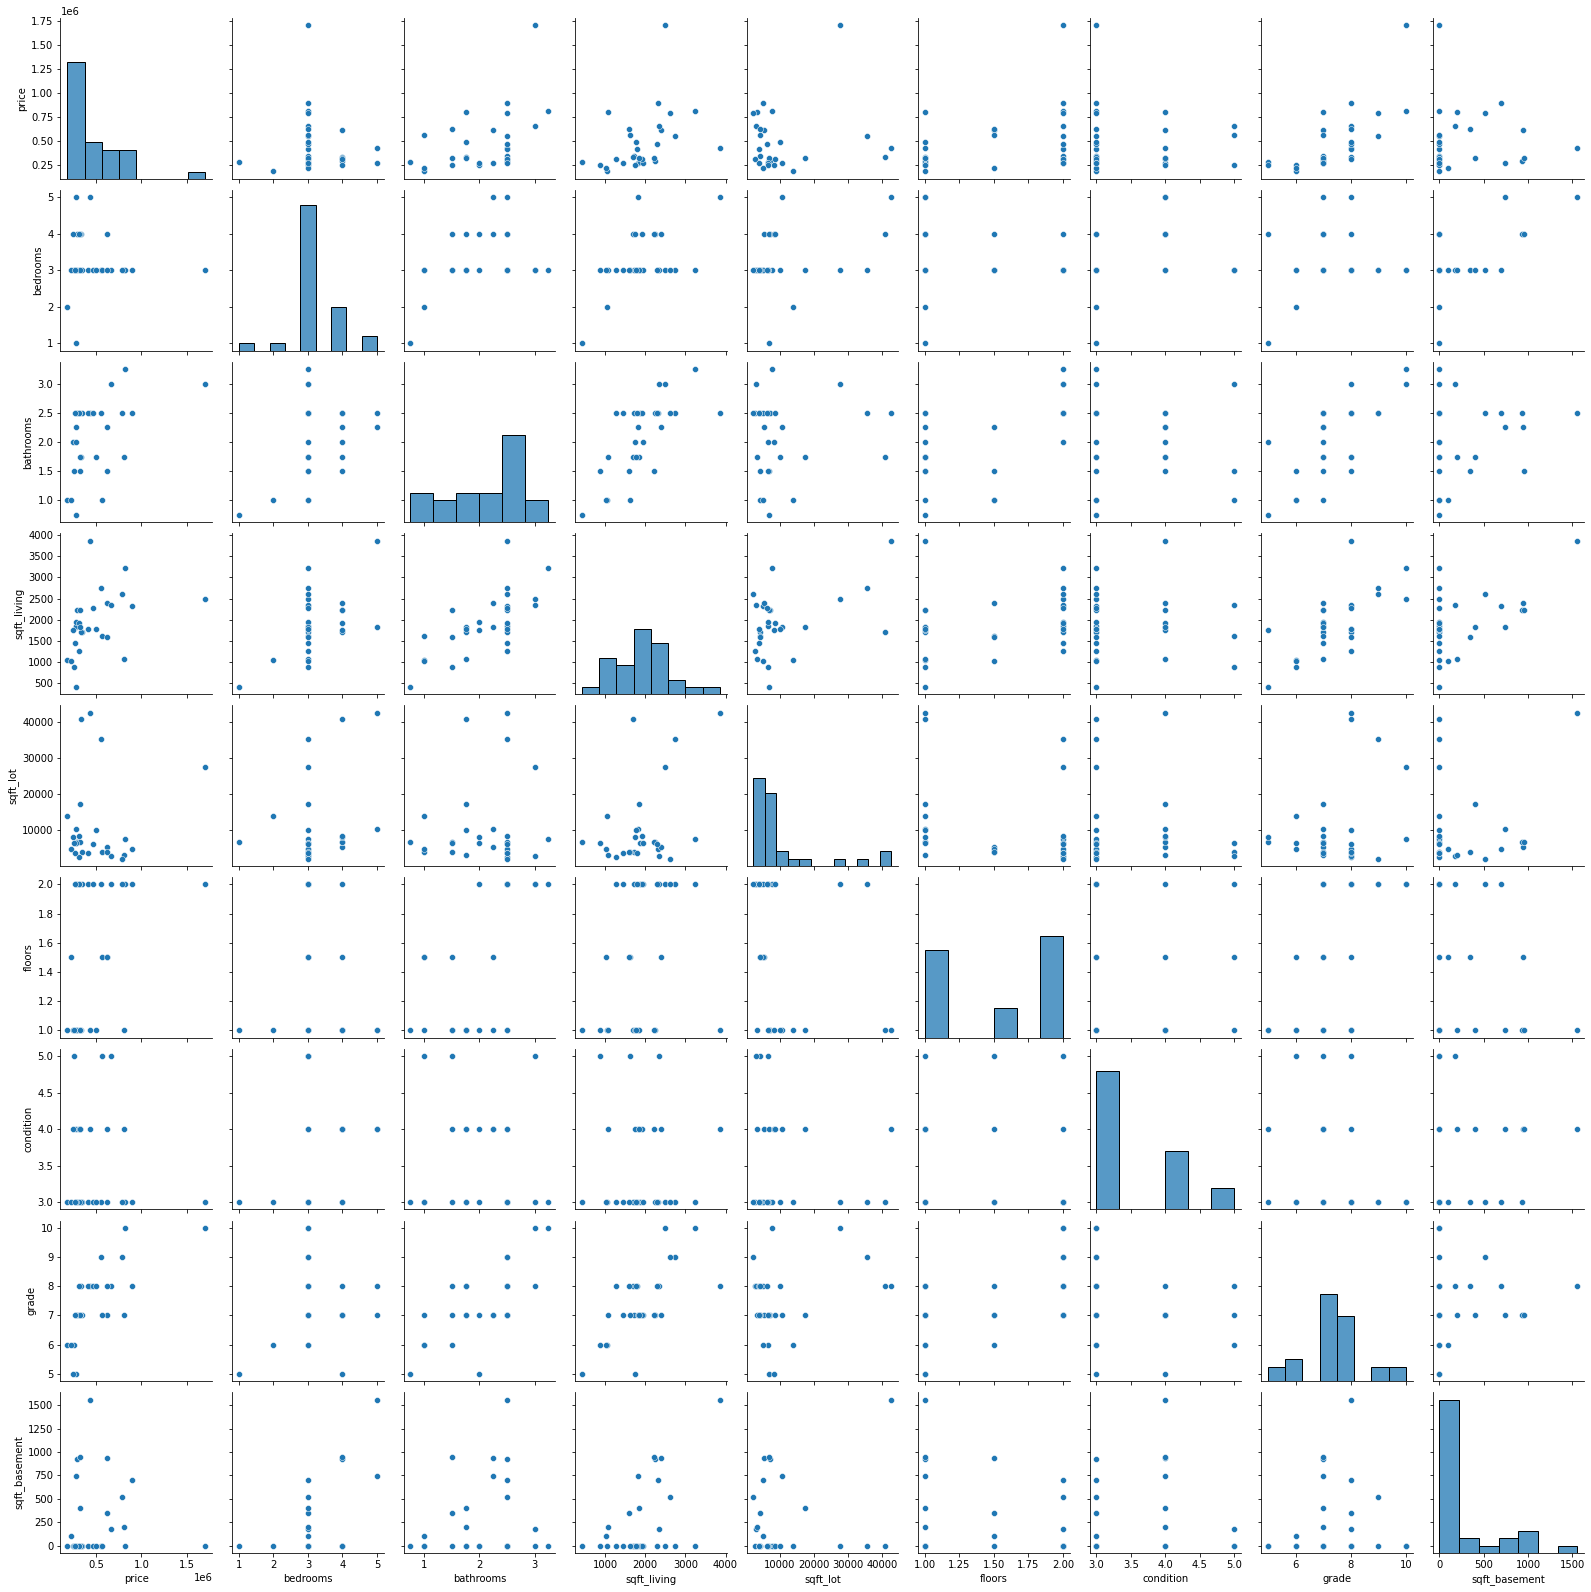

In [ ]:
sns.pairplot(house_data_temp)

Correlation heatmap

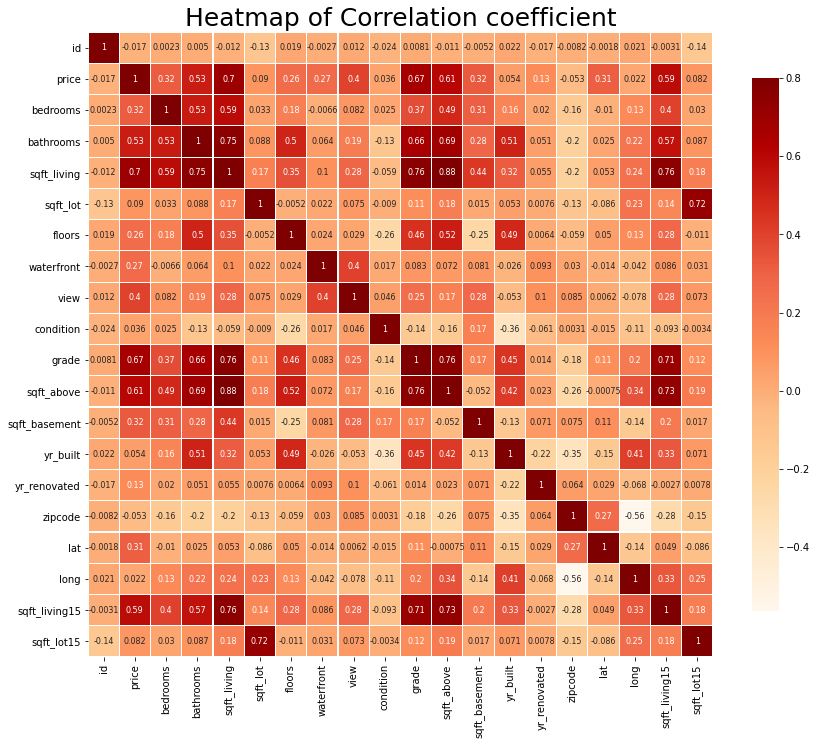

In [32]:
plt.figure(figsize=(14,14))
plt.title('Heatmap of Correlation coefficient',fontsize=25)
sns.heatmap(house_data.corr(),linewidths=0.15,vmax=0.8,square=True,cmap="OrRd",linecolor='w',
            annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .7})
plt.show()

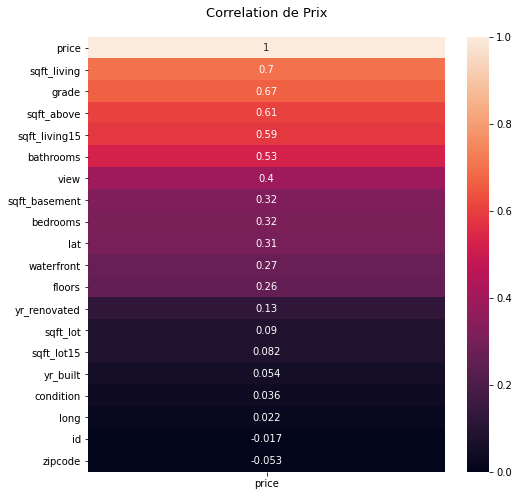

In [34]:
#Heatmap avec seulement la colonne Price 

plt.rcParams['figure.figsize'] = [8, 8]

_ = sns.heatmap(house_data.corr()[['price']]
                .sort_values(by='price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True);

_.set_title('Correlation de Prix',
            fontdict={'fontsize':13},
            pad=20);

plt.show()

#Régression linéaire multivariée avec train Test

In [41]:
from sklearn.model_selection import train_test_split

#1ère regression
X = house_data[['grade', 'sqft_living','sqft_above']]
y = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

from sklearn.preprocessing import StandardScaler

#On crée un model scaler et on l'entraine afin de normaliser les données
scaler = StandardScaler().fit(X_train)

#Normalisation des données
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

print("Score de précision sur l'ensemble d'entraînement : %.5f" % model.score(X_train_scaled, y_train))
print("Score de précision sur l'ensemble de test : %.5f" % model.score(X_test_scaled, y_test))

Score de précision sur l'ensemble d'entraînement : 0.53754
Score de précision sur l'ensemble de test : 0.54927


Score non satisfaisant, donc on rajoute des variables :

In [42]:
#2nd regression
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

#On crée un model scaler et on l'entraine afin de normaliser les données
scaler = StandardScaler().fit(X_train)

#Normalisation des données
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_2 = LinearRegression().fit(X_train_scaled, y_train)

print("Score de précision sur l'ensemble d'entraînement : %.5f" % model_2.score(X_train_scaled, y_train))
print("Score de précision sur l'ensemble de test : %.5f" % model_2.score(X_test_scaled, y_test))

Score de précision sur l'ensemble d'entraînement : 0.69578
Score de précision sur l'ensemble de test : 0.69495


#Prédictions pour les 4 dernières colonnes

In [44]:
house_data_to_predict['predict_price'] = model2.predict(house_data_to_predict[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']])

In [45]:
house_data_to_predict.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_price
21609,6600060120,2015-02-23,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,462624.693938
21610,1523300141,2014-06-23,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,164579.557415
21611,291310100,2015-01-16,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,372331.451653
21612,1523300157,2014-10-15,NaN,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,167118.325261


In [46]:
for i in range(4):
  print("Le lot n°{} est évalué à {}$".format(house_data_to_predict.iloc[i,0],round(house_data_to_predict.iloc[i,21], 2))) 

Le lot n°6600060120 est évalué à 462624.69$
Le lot n°1523300141 est évalué à 164579.56$
Le lot n°291310100 est évalué à 372331.45$
Le lot n°1523300157 est évalué à 167118.33$
